# BK2 physics: Simulation of a mass on a spring

## Theory

[This is an example of a 'Markdown' cell where you can enter text and equations]

Consider a bead of mass $m$ on a spring with spring constant $k$.


Hooke's law: $F = -kx$

Newton's second law: $F = ma$


## Simulation

We will setup a numerical simulation using the Python programming language.

First we import the packages that we need:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

Now we are ready to define our Python function, 'LeapFrog(...)' which will simulate a mass attached a to spring, using the LeapFrog method. 

** NOTE: you have to complete the comment lines describing the parameters to the function. You should insert text describing what the parameters mean, not numbers **

** NOTE: you have to change the line a = ... **

In [2]:
def LeapFrog(m, k, dt, t_end, v0, x0):
    """ Run a numerical simulation of a mass and a spring using Leap-Frog.
    Parameters:
        m: mass
        k: spring constant
        dt: derivation of time
        t_end: total time
        v0: initial velocity
        x0: initial position
    Returns:
        ttable: list of points in time
        xtable: list of positions
        vtable: list of velocities
    """
    
    n_steps = int(t_end/dt)  # Number of steps
    
    ttable = np.zeros(n_steps)
    xtable = np.zeros(n_steps)
    vtable = np.zeros(n_steps)
    
    t = 0.0
    x = x0
    v = v0
    
    for i in range(n_steps):
        ttable[i] = t
        xtable[i] = x
        vtable[i] = v
        
        t = t + dt
        a = (-k * x) / m
        v = v + a*dt  # a = dv/dt
        x = x + v*dt  # v = dx/dt
        

    
    return ttable,xtable,vtable

If you wrote good desciptions of the parameters, the function should give some descriptive help:

In [3]:
help(LeapFrog)

Help on function LeapFrog in module __main__:

LeapFrog(m, k, dt, t_end, v0, x0)
    Run a numerical simulation of a mass and a spring using Leap-Frog.
    Parameters:
        m: mass
        k: spring constant
        dt: derivation of time
        t_end: total time
        v0: initial velocity
        x0: initial position
    Returns:
        ttable: list of points in time
        xtable: list of positions
        vtable: list of velocities



Now we are ready to run the simulation:

** NOTE: you have to insert the numbers describing the simulation you want **

In [ ]:
ttable,xtable,vtable = LeapFrog(m=5, k=50, dt=0.01, t_end=10, v0=0, x0=0.1)

The result of the simulation is now stored in the tables, ttable, xtable, and vtable

In [29]:
print(xtable)
    

[ 0.1         0.0999      0.0997001   0.0994005   0.0990015   0.0985035
  0.09790699  0.09721258  0.09642095  0.09553291  0.09454933  0.0934712
  0.0922996   0.0910357   0.08968077  0.08823615  0.0867033   0.08508374
  0.08337911  0.08159109  0.07972148  0.07777215  0.07574505  0.0736422
  0.07146571  0.06921775  0.06690058  0.0645165   0.06206791  0.05955726
  0.05698704  0.05435984  0.05167828  0.04894503  0.04616285  0.0433345
  0.04046282  0.03755067  0.03460097  0.03161668  0.02860076  0.02555625
  0.02248618  0.01939362  0.01628167  0.01315344  0.01001205  0.00686065
  0.00370239  0.00054043 -0.00262207 -0.00578195 -0.00893605 -0.01208121
 -0.01521429 -0.01833216 -0.02143169 -0.02450979 -0.02756339 -0.03058941
 -0.03358485 -0.03654671 -0.03947202 -0.04235785 -0.04520133 -0.04799961
 -0.05074989 -0.05344941 -0.05609549 -0.05868547 -0.06121677 -0.06368685
 -0.06609324 -0.06843354 -0.07070541 -0.07290657 -0.07503483 -0.07708805
 -0.07906418 -0.08096125 -0.08277735 -0.08451068 -0.086

Let's plot x as a function of t, using the data stored in the tables:

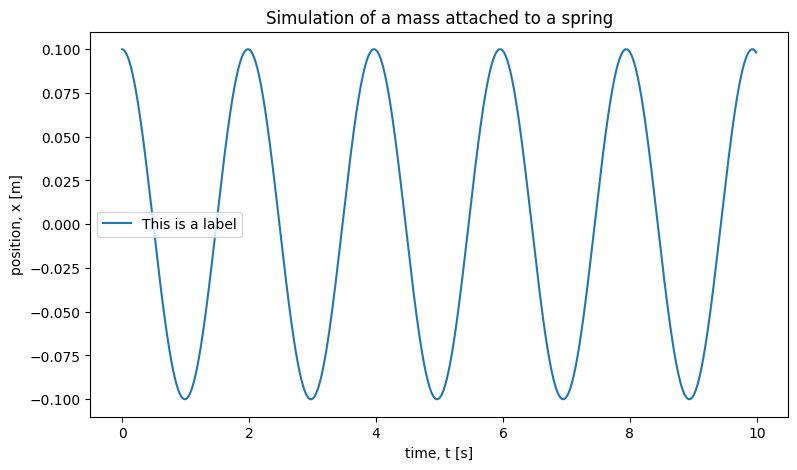

In [68]:
plt.figure(figsize=(9, 5))
plt.plot(ttable,xtable,'-', label='This is a label')
plt.title("Simulation of a mass attached to a spring")
plt.xlabel("time, t [s]")
plt.ylabel("position, x [m]")
plt.legend()
plt.savefig('spring.pdf')
plt.show()

... you should now be set up to do the exercises in the note.

Make sure you document everything here in the notebook - you can use the notebook to make your final report

Here is a function that you might find usefull to determine the period of a simulation. The simulation needs to be so long that x changes sign at least twice. You do not have to understand the function in detail, but check that it gives a result that is consistent with what you get when you read of the period 'by hand'.

In [51]:
def FindPeriod(xtable, ttable):
    n = len(xtable)
    signshifts = np.argwhere(xtable[1:n]*xtable[0:n-1]<0)
    if len(signshifts)<2:
        print('Simulation not long enough to determine period!')
        return 0
    return 2*ttable[signshifts[1] - signshifts[0]][0]


In [52]:
T = FindPeriod(xtable, ttable)
T

np.float64(1.9800000000000013)

[ 0.1         0.09995     0.09985003  0.09970012  0.09950037  0.09925087
  0.09895175  0.09860315  0.09820524  0.09775824  0.09726235  0.09671784
  0.09612496  0.09548403  0.09479535  0.09405927  0.09327616  0.09244642
  0.09157045  0.0906487   0.08968162  0.0886697   0.08761345  0.08651339
  0.08537007  0.08418407  0.08295597  0.0816864   0.08037599  0.07902538
  0.07763527  0.07620634  0.0747393   0.07323489  0.07169387  0.070117
  0.06850507  0.06685889  0.06517928  0.06346708  0.06172314  0.05994835
  0.05814358  0.05630973  0.05444774  0.05255852  0.05064302  0.0487022
  0.04673702  0.04474848  0.04273757  0.04070529  0.03865265  0.03658069
  0.03449043  0.03238293  0.03025924  0.02812043  0.02596755  0.02380168
  0.02162392  0.01943534  0.01723705  0.01503014  0.01281571  0.01059487
  0.00836874  0.00613842  0.00390504  0.0016697  -0.00056648 -0.00280237
 -0.00503686 -0.00726883 -0.00949716 -0.01172075 -0.01393848 -0.01614924
 -0.01835192 -0.02054543 -0.02272866 -0.02490053 -0.02

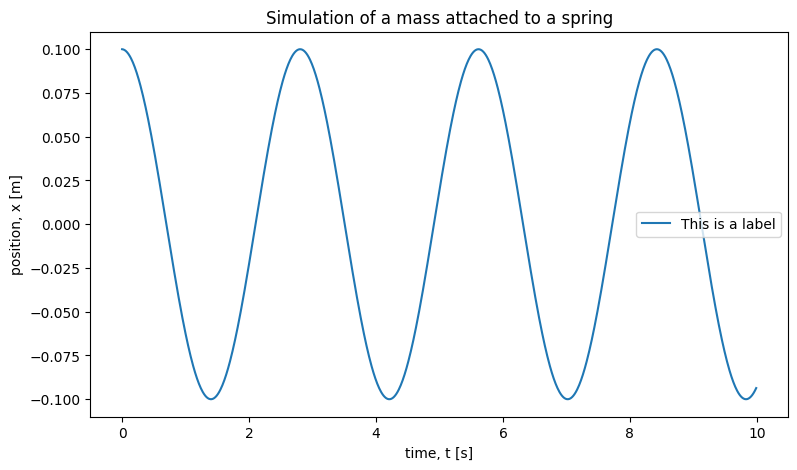

In [73]:
def LeapFrogSimple(p, dt, t_end, v0, x0):
    """ Run a numerical simulation of a mass and a spring using Leap-Frog.
    Parameters:
        p: ratio of spring constant to mass
        dt: derivation of time
        t_end: total time
        v0: initial velocity
        x0: initial position
    Returns:
        ttable: list of points in time
        xtable: list of positions
        vtable: list of velocities
    """
    
    n_steps = int(t_end/dt)  # Number of steps
    
    ttable = np.zeros(n_steps)
    xtable = np.zeros(n_steps)
    vtable = np.zeros(n_steps)
    
    t = 0.0
    x = x0
    v = v0
    
    for i in range(n_steps):
        ttable[i] = t
        xtable[i] = x
        vtable[i] = v
        
        t = t + dt
        a = (-p * x)
        v = v + a*dt  # a = dv/dt
        x = x + v*dt  # v = dx/dt
        

    
    return ttable,xtable,vtable
ttable,xtable,vtable = LeapFrogSimple(p=5, dt=0.01, t_end=10, v0=0, x0=0.1)
print(xtable)
plt.figure(figsize=(9, 5))
plt.plot(ttable,xtable,'-', label='This is a label')
plt.title("Simulation of a mass attached to a spring")
plt.xlabel("time, t [s]")
plt.ylabel("position, x [m]")
plt.legend()
plt.savefig('spring.pdf')
plt.show()

In [90]:
size = 10
ptable = np.zeros(size)
Ttable = np.zeros(size)

for i in range(size):
    p = i + 1
    ttable, xtable, vtable = LeapFrogSimple(p=p, dt=0.01, t_end=10, v0=0, x0=0.1)
    T = FindPeriod(xtable, ttable)
    ptable[i] = p
    Ttable[i] = T

print(ptable, "\n", Ttable)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 
 [6.28 4.44 3.62 3.14 2.82 2.56 2.38 2.22 2.1  1.98]


In [85]:
def FindPeriodManual(p):
    return 2 * math.pi * math.sqrt(1/p)

FindPeriodManual(10)

1.9869176531592203

$ T = 2 \pi \sqrt{\frac 1 p} $

## Where is the resonance?
When you get to exercise 10, you need to make a new version of the function whith an extra small force emulating the wind, or the effect of pedistrians walking on a bridge. Note that there is an extra input-parameter to the function:

In [ ]:
def LeapFrog_extra(m, k, dt, t_end, v0, x0, Te):
    """ Run a numerical simulation of a mass and a spring using Leap-Frog.
    Parameters:
        m: 
        k:
        dt:
        t_end:
        v0:
        x0:
        Te: 
    Returns:
        ttable:
        ttable: 
        vtable:
    """
    
    n_steps = int(t_end/dt)  # Number of steps
    
    ttable = np.zeros(n_steps)
    xtable = np.zeros(n_steps)
    vtable = np.zeros(n_steps)
    
    t = 0.0
    x = x0
    v = v0
    
    for i in range(n_steps):
        t = t + dt
        Fextra =  0.01*np.cos(2*np.pi*t/Te);
        a = ...
        v = v + a*dt  # a = dv/dt
        x = x + v*dt  # v = dx/dt
        
        ttable[i] = t
        xtable[i] = x
        vtable[i] = v
    
    return ttable, xtable, vtable

Remember to add the new parameter when you call the function. After the new simulation, you should again plot xtable vs. ttable. Try different Te-values. Can you find the resonance?

In [ ]:
ttable,xtable,vtable = LeapFrog_extra(m=, k=, dt=, t_end=, v0=0, x0=0, Te=) 

If you find the resonance difficult to find, you can make a lot of simulations in one step (be carefull that it does not take to long):

In [ ]:
Te_table = np.linspace(1, 20, 50)
max_x = np.zeros_like(Te_table)

for i, Te in enumerate(Te_table):
    ttable,xtable,vtable = LeapFrog_extra(m=, k=, dt=, t_end=, v0=0.0, x0=0.0, Te=Te)
    max_x[i] = np.max(xtable)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(Te_table, max_x, '.-', label='This is a label')
plt.title("Resonance in a mass attached to a spring")
plt.xlabel("Period of extra force, Te [s]")
plt.ylabel("maximum position, max_x [m]")
plt.legend()
plt.savefig('resonance.pdf')
plt.show()